In [2]:
!pip install ucimlrepo

# Data Loading and Analysis

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [4]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [6]:
print("Duplicates in X:", X.duplicated().sum())
print("Duplicates in y:", y.duplicated().sum())

Duplicates in X: 1179
Duplicates in y: 6490


# Preprocessing

In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Concatenated x and y into variable data
data = pd.concat([X, y], axis=1)

print("Before removing duplicates:", data.shape)
#Dropped the duplicates
data = data.drop_duplicates()

print("After removing duplicates:", data.shape)

print("\nCleaned Data:")
print(data.head())


X_clean = data.drop('quality', axis=1)
y_clean = data['quality']

Before removing duplicates: (6497, 12)
After removing duplicates: (5318, 12)

Cleaned Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.5

In [8]:
print(X.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [9]:
X_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [10]:
y_clean.head()

,quality
0,5
1,5
2,5
3,6
5,5


In [11]:
# Grouped the values as low, medium, high
def map_quality(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

y_grouped = y_clean.apply(map_quality)

print(y_grouped.value_counts())

quality
Medium    4074
High      1008
Low        236
Name: count, dtype: int64


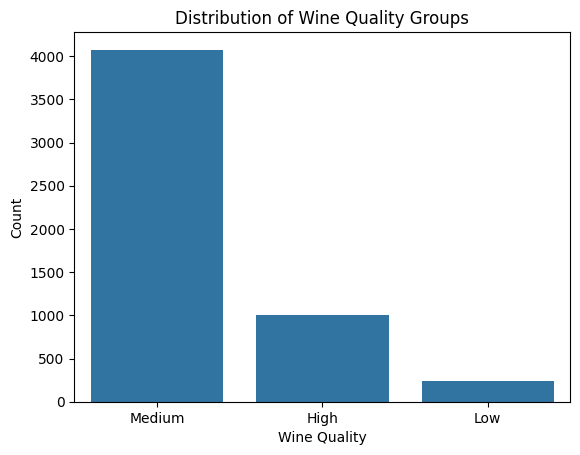

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_grouped)
plt.title("Distribution of Wine Quality Groups")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

# Splitting of data

In [13]:
from sklearn.model_selection import train_test_split
# Splitted the data into train,validation and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_clean, y_grouped, test_size=0.3, random_state=42, stratify=y_grouped)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3722, 11)
Validation size: (798, 11)
Test size: (798, 11)


In [14]:
#Training the model using balanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [15]:
#Evaluation of rf
y_val_pred = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.793233082706767

Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.32      0.42       151
         Low       1.00      0.06      0.11        35
      Medium       0.81      0.95      0.88       612

    accuracy                           0.79       798
   macro avg       0.81      0.44      0.47       798
weighted avg       0.78      0.79      0.76       798


Confusion Matrix:
 [[ 48   0 103]
 [  0   2  33]
 [ 29   0 583]]


# Handling Class Imbalance

In [16]:
#Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(y_train_res.value_counts())

quality
High      2851
Medium    2851
Low       2851
Name: count, dtype: int64


In [17]:
#Training the model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [18]:
y_val_pred = rf.predict(X_val)
#Evaluation of rf
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.7330827067669173

Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.63      0.54       151
         Low       0.29      0.40      0.33        35
      Medium       0.87      0.78      0.82       612

    accuracy                           0.73       798
   macro avg       0.54      0.60      0.56       798
weighted avg       0.77      0.73      0.75       798


Confusion Matrix:
 [[ 95   4  52]
 [  1  14  20]
 [105  31 476]]


# Hyperparameter tuning

In [19]:
#Finding the best parameters using HalvingRandomSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

halving_search = HalvingRandomSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    factor=2,
    resource='n_estimators',
    max_resources=200,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)


halving_search.fit(X_train, y_train)

print("Best Hyperparameters:", halving_search.best_params_)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 1
max_resources_: 200
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 144
n_resources: 1
Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 144 is smaller than n_iter=200. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 72
n_resources: 2
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 36
n_resources: 4
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 3
n_candidates: 18
n_resources: 8
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 4
n_candidates: 9
n_resources: 16
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 5
n_candidates: 5
n_resources: 32
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 3
n_resources: 64
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 128
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True, 'n_estimators': 128}


# Model Training

In [20]:
#Training the final model using best parameters
best_rf = RandomForestClassifier(
    n_estimators=128,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    bootstrap=True,
    random_state=42
)

best_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
                       n_estimators=128, random_state=42)

# Model Evaluation

In [21]:
y_pred = best_rf.predict(X_test)
#Evaluation of final model
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7305764411027569

Classification Report:
               precision    recall  f1-score   support

        High       0.49      0.74      0.59       151
         Low       0.28      0.44      0.34        36
      Medium       0.89      0.75      0.81       611

    accuracy                           0.73       798
   macro avg       0.55      0.64      0.58       798
weighted avg       0.78      0.73      0.75       798


Confusion Matrix:
 [[111   0  40]
 [  2  16  18]
 [114  41 456]]


# Feature Importance

In [22]:
importances = best_rf.feature_importances_
features = pd.Series(importances, index=X_train.columns)
#Finding the most influenticial features
features_sorted = features.sort_values(ascending=False)

print("\nTop features by importance:\n", features_sorted)


Top features by importance:
 alcohol                 0.165679
free_sulfur_dioxide     0.126545
volatile_acidity        0.104220
total_sulfur_dioxide    0.100634
density                 0.086672
sulphates               0.083796
chlorides               0.081507
residual_sugar          0.070116
fixed_acidity           0.065031
citric_acid             0.058474
pH                      0.057327
dtype: float64


# Visualization

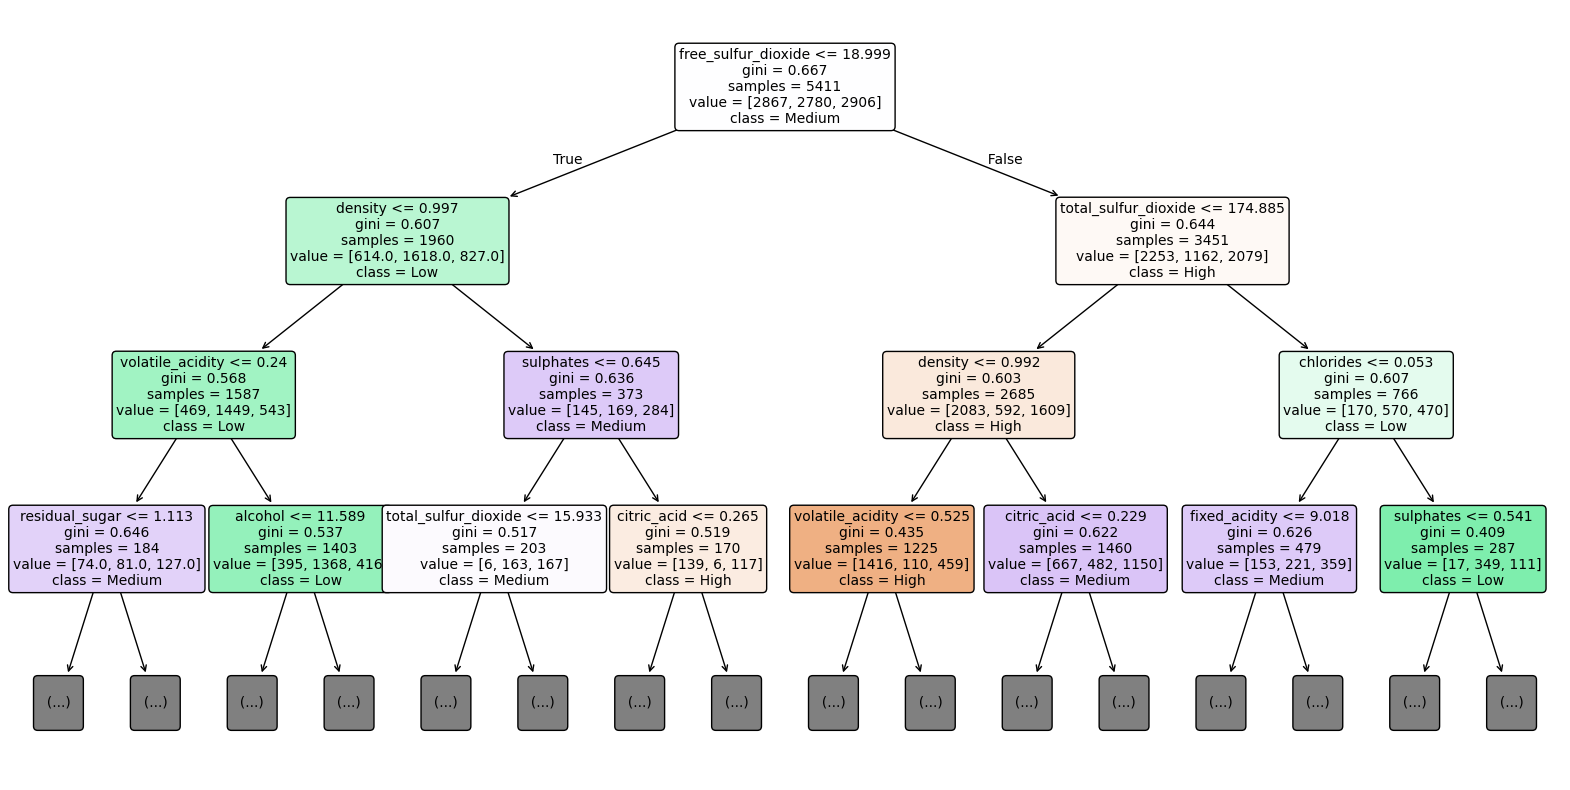

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = best_rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=X_train.columns,
    class_names=best_rf.classes_,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.show()

In [25]:
import numpy as np
sample = X_test.iloc[[0]].to_numpy(dtype=np.float32)

tree = best_rf.estimators_[0]
tree_ = tree.tree_

feature_names = X_train.columns

node_indicator = tree_.decision_path(sample)

print("Decision path for sample 0:")
for node_id in node_indicator.indices:
    if tree_.children_left[node_id] != tree_.children_right[node_id]:
        feature = feature_names[tree_.feature[node_id]]
        threshold = tree_.threshold[node_id]
        sample_value = sample[0, tree_.feature[node_id]]
        direction = "left" if sample_value <= threshold else "right"
        print(f"Node {node_id}: {feature} <= {threshold:.3f} (sample value = {sample_value}, go {direction})")

Decision path for sample 0:
Node 0: free_sulfur_dioxide <= 18.999 (sample value = 12.0, go left)
Node 1: density <= 0.997 (sample value = 0.9983999729156494, go right)
Node 343: sulphates <= 0.645 (sample value = 0.6499999761581421, go right)
Node 395: citric_acid <= 0.265 (sample value = 0.38999998569488525, go right)
Node 399: chlorides <= 0.117 (sample value = 0.06400000303983688, go left)
Node 400: total_sulfur_dioxide <= 51.795 (sample value = 31.0, go left)
Node 401: density <= 1.000 (sample value = 0.9983999729156494, go left)
Node 402: volatile_acidity <= 0.605 (sample value = 0.4099999964237213, go left)
Node 403: free_sulfur_dioxide <= 5.041 (sample value = 12.0, go right)
Node 407: free_sulfur_dioxide <= 5.980 (sample value = 12.0, go right)
Node 409: density <= 0.998 (sample value = 0.9983999729156494, go right)
Node 413: volatile_acidity <= 0.285 (sample value = 0.4099999964237213, go right)
Node 415: residual_sugar <= 2.273 (sample value = 2.200000047683716, go left)
